<a href="https://colab.research.google.com/github/GabrielFePL/Machine-Learning-Fatec-Matao/blob/main/CN2AndKnnModelsImplementation_Class_05_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Fatec Matão

## Pré-Processamento de Dados

### Importação de Bibliotecas

* O pandas é uma biblioteca do Python usada para manipulação e análise de dados, oferecendo estruturas como DataFrame e Series para organizar, filtrar, transformar e visualizar dados de forma eficiente. Documentação: https://pandas.pydata.org/docs/

* O NumPy é uma biblioteca do Python para cálculos numéricos, oferecendo arrays multidimensionais eficientes e funções matemáticas otimizadas para operações científicas e estatísticas. Documentação: https://numpy.org/doc/

* O Seaborn é uma biblioteca do Python para visualização de dados, baseada no Matplotlib, que facilita a criação de gráficos estatísticos elegantes e informativos com menos código. Documentação: https://seaborn.pydata.org/

* O matplotlib.pyplot é um módulo do Matplotlib que permite criar gráficos estáticos, interativos e personalizados em Python, sendo amplamente usado para visualização de dados. Documentação: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

* O plotly.express é uma biblioteca do Python para criar gráficos interativos e dinâmicos de forma simples, permitindo visualizações ricas e personalizáveis com poucos comandos. Documentação: https://plotly.com/python-api-reference/plotly.express.html

* O sklearn.preprocessing.StandardScaler é uma ferramenta do Scikit-learn para padronizar dados, centralizando a média em 0 e a variância em 1. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* O sklearn.model_selection.train_test_split é uma função do Scikit-learn para dividir conjuntos de dados em treinos e testes de forma aleatória. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

* O pickle é um módulo do Python para serialização e desserialização de objetos Python, permitindo salvar e carregar modelos treinados. Documentação: https://docs.python.org/pt-br/dev/library/pickle.html

In [69]:
!pip install plotly --upgrade
!pip install Orange3==3.36.2

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
import pickle
import Orange
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


### Carregamento de Datasets

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Credit Rules Dataset

In [75]:
credit_data_table = Orange.data.Table('/content/drive/MyDrive/machine_learning_semestre_5/credit_data_regras.csv')
credit_data_table

[[66155.9, 59.017, 8106.53 | 0],
 [34415.2, 48.1172, 6564.75 | 0],
 [57317.2, 63.108, 8020.95 | 0],
 [42709.5, 45.752, 6103.64 | 0],
 [66952.7, 18.5843, 8770.1 | 1],
 ...
]

In [76]:
credit_data_table.domain

[income, age, loan | default]

#### Census Rules Dataset

In [94]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/census.pkl', 'rb') as f:
  x_census_train, x_census_test, y_census_train, y_census_test = pickle.load(f)

In [98]:
x_census_train.shape, y_census_train.shape

((24420, 108), (24420,))

In [99]:
x_census_test.shape, y_census_test.shape

((8141, 108), (8141,))

### Amostragem

In [78]:
credit_data_sample = Orange.evaluation.testing.sample(credit_data_table, n=0.25)

In [79]:
credit_data_sample[0]
credit_data_sample[1]

[[56275.4, 30.2499, 2224.88 | 0],
 [30216.3, 26.5637, 2116.54 | 0],
 [43440, 24.1795, 6879.31 | 1],
 [66370.7, 38.4055, 5906.03 | 0],
 [66952.7, 18.5843, 8770.1 | 1],
 ...
]

In [80]:
train_credit_data_sample = credit_data_sample[1]
test_credit_data_sample = credit_data_sample[0]

In [81]:
len(train_credit_data_sample), len(test_credit_data_sample)

(1500, 500)

### Ingestão e Treinamento Neural Modelo

#### CN2

In [89]:
cn2_credit = Orange.classification.rules.CN2Learner()
credit_rules = cn2_credit(train_credit_data_sample)

In [90]:
for rule in credit_rules.rule_list:
  print(rule)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF income<=31702.3342987522 AND loan>=3665.88089899456 THEN default=1 
IF loan>=7708.31562497011 AND loan>=9601.375482171099 THEN default=1 
IF loan>=7513.18286435755 AND loan>=9595.28628892989 THEN default=0 
IF loan>=8066.69786524019 THEN default=1 
IF income>=58147.7998569608 AND age>=22.939635145478 THEN default=0 
IF loan>=6016.61509078929 AND loan>=7983.705373244459 THEN default=0 
IF age<=22.4861360387877 AND income>=58609.13148382679 THEN default=0 
IF loan>=6016.61509078929 AND age>=26.854012909811 THEN default=1 
IF loan>=6053.79158149127 AND age>=26.7719294563867 THEN default=0 
IF loan>=6053.79158149127 AND loan>=6361.97343810153 THEN default=1 
IF income>=50360.6787929311 THEN default=0 
IF income<=22089.8374845274 AND age>=23.238169600255798 THEN default=1 
IF loan>=4849.33378471958 AND loan>=5862.83302915672 THEN default=1 
IF income>=46132.9140514135 THEN defa

#### KNN

In [100]:
knn_census = KNeighborsClassifier(n_neighbors=10,)
knn_census.fit(x_census_train, y_census_train)

KNeighborsClassifier(n_neighbors=10)

### Avaliação Neural

#### CN2

In [91]:
rules_predictors = Orange.evaluation.testing.TestOnTestData(train_credit_data_sample, test_credit_data_sample, [lambda test_data: credit_rules])

In [92]:
Orange.evaluation.CA(rules_predictors)

array([0.986])

#### KNN

In [101]:
knn_predictors = knn_census.predict(x_census_test)

In [102]:
accuracy_score(y_census_test, knn_predictors)

0.8301191499815748

0.8301191499815748

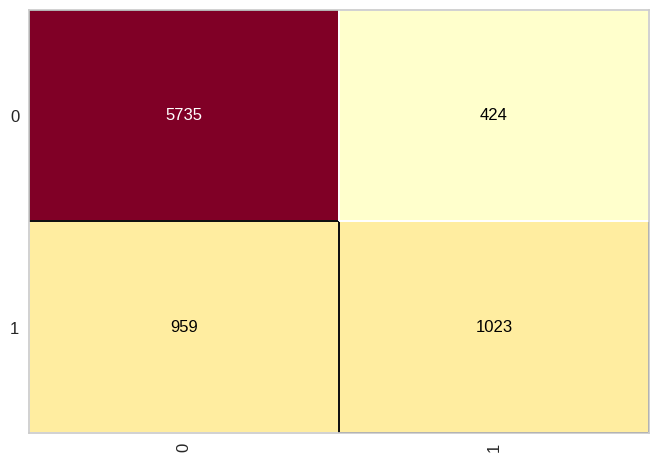

In [106]:
knn_confusion_matrix = ConfusionMatrix(knn_census)
knn_confusion_matrix.fit(x_census_train, y_census_train)
knn_confusion_matrix.score(x_census_test, y_census_test)

In [108]:
print(classification_report(y_census_test, knn_predictors))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6159
           1       0.71      0.52      0.60      1982

    accuracy                           0.83      8141
   macro avg       0.78      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141

